In [1]:
import networkx as nx
import math
import random

from util import parse_graph_from_edgelist_file
from solver import SteinerTreeSolver

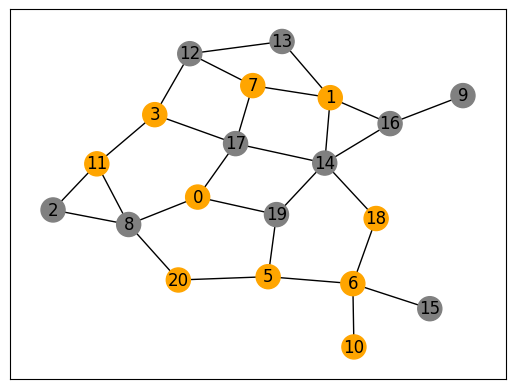

In [2]:
G = parse_graph_from_edgelist_file("instances/graph1.edges")
positions = nx.layout.kamada_kawai_layout(G)

for (p, q) in G.edges():
    distance = math.dist(positions[p], positions[q])
    G[p][q]["weight"] = distance

terminals = random.sample(list(G.nodes()), k=G.number_of_nodes() // 2)
nx.draw_networkx(G, pos=positions, node_color=["orange" if v in terminals else "grey" for v in G.nodes()])

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-04
Set parameter LazyConstraints to value 1
Root node: 20
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 12 physical cores, 24 logical processors, using up to 24 threads
Optimize a model with 93 rows, 56 columns and 316 nonzeros
Model fingerprint: 0x7445fe05
Variable types: 0 continuous, 56 integer (56 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
INTEGRAL
Cycle was forbidden!
Presolve removed 15 rows and 6 columns
Presolve time: 0.00s
Presolved: 78 rows, 50 columns, 221 nonzeros
Variable types: 0 continuous, 50 integer (50 binary)
INTEGRAL
Cycle was forbidden!
INTEGRAL
Found heuristic solution: objective 6.2184455
INTEGRAL
Cycle was forbidden!

Root relaxation: objective 4.048525e+00, 29 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Curren

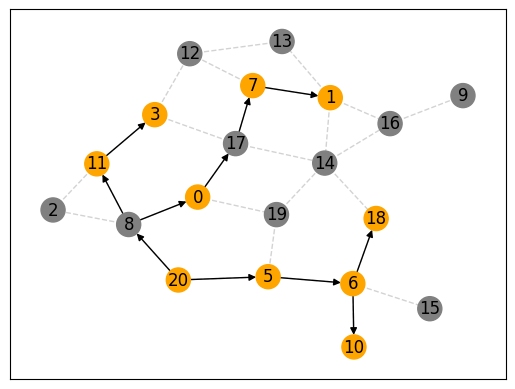

In [3]:
solver = SteinerTreeSolver(G)
tree = solver.solve(terminals)
nx.draw_networkx_nodes(G, pos=positions, node_color=["orange" if v in terminals else "grey" for v in G.nodes()])
nx.draw_networkx_edges(G, pos=positions, style="dashed", edge_color="lightgrey")
nx.draw_networkx_edges(tree, pos=positions)
nx.draw_networkx_labels(G, pos=positions)
print("Done!")